<h1 align='center'> CS353 Machine Learning Lab</h1>
<h1 align='center'>Lab-2 (05/04/21)</h1>
<h2 align='center'>Shumbul Arifa (181CO152)</h2>

## Task:
Implementing NOR Gate using Artificial Neural Network.

(An artificial neural network (ANN) is the piece of a computing system designed to simulate the way the human brain analyzes and processes information. It is the foundation of artificial intelligence (AI) and solves problems that would prove impossible or difficult by human or statistical standards.)

## 1) Import libraries

In [26]:
import numpy as np
from matplotlib import pyplot as plt

## 2) Activation function

In [27]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
#     print("Sigmoid of \n", x, " = ", z, "\n")
    return z

## 3)  Initialising weight using ```np.rand``` 



In [28]:
def initializeParameters(inputFeatures, HiddenLayer, outputFeatures):
    W1 = np.random.randn(HiddenLayer, inputFeatures)
    W2 = np.random.randn(outputFeatures, HiddenLayer)
    b1 = np.zeros((HiddenLayer, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters
  

## 4) Forward Propogation

In [29]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
  
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
  
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

**Class entropy error function = -ylog(y') - (1-y)log(1-y')** \
y -> actual output \
y' -> predicted output

## 5) Backward Propogation

In [30]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
      
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
      
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
      
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

## 6) Weight Updation

In [31]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Training

Here, we train the neural network for 10000 epochs

**NOR Gate:**

0 NOR 0 -> 1

0 NOR 1 -> 0

1 NOR 0 -> 0

1 NOR 1 -> 0

In [32]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # NOR input
Y = np.array([[1, 0, 0, 0]]) # NOR output

HiddenLayerNeurons = 2 
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0] 
parameters = initializeParameters(inputFeatures, HiddenLayerNeurons, outputFeatures)
epoch = 10000
learningRate = 0.01
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Analysis


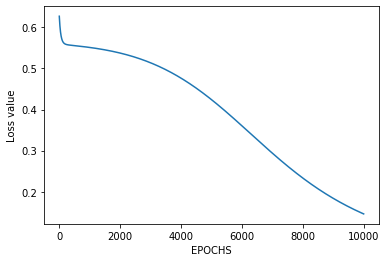

In [33]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

**TESTING**

In [34]:
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

[[0. 0. 1. 0.]]


We observe that the predicted outputs for each of the test inputs are matched with the NOR logic gate truth table.